# Analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
# Take in all of our wrestling data and read it into pandas
ride_df = pd.read_csv("raw_data/ride_data.csv")
city_df = pd.read_csv("raw_data/city_data.csv")

In [81]:
#combine both CSV data into new Data Frame
combined_df = city_df.merge(ride_df, on = 'city')
combined_df.head()



,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [82]:
#group by city
group_by_city = combined_df.groupby('city')

# ride count per city
rides_count = group_df['city'].count()

# city by city type
city_type = city_df.set_index('city')['type']

# Avg fare calculation per city
avg_fare = group_df['fare'].mean()

#driver count 
driver_count = group_df['driver_count'].sum()

#create new data frame
new_city_info = pd.DataFrame({"Number of Rides" : rides_count,
                           "Avg Fare" : avg_fare,
                           "Number of Drivers": driver_city,
                           "type" : city_type})


new_city_info.head()





,Avg Fare,Number of Drivers,Number of Rides,type
Amandaburgh,24.641667,216,18,Urban
Barajasview,25.332273,572,22,Urban
Barronchester,36.422500,176,16,Suburban
Bethanyland,32.956111,396,18,Suburban
Bradshawfurt,40.064000,70,10,Rural


In [80]:
# creating separate dfs for each city type
urban_df = new_city_info.loc[new_city_info['type']=="Urban"]
rural_df = new_city_info.loc[new_city_info['type']=="Rural"]
suburban_df = new_city_info.loc[new_city_info['type']=="Suburban"]

# Bubble plot of Rides Data

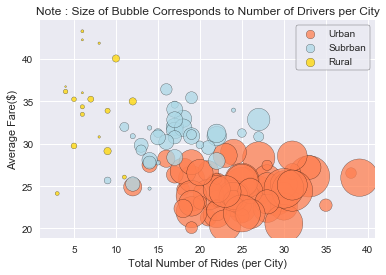

In [142]:
# Create a scatter plot which compares rides to fare
import seaborn as sns
plt.scatter(urban_df['Number of Rides'],urban_df['Avg Fare'], s = urban_df['Number of Drivers']*0.75, marker = 'o', 
                                       facecolors ='Coral', alpha =0.75, edgecolors ='black', label = 'Urban')


plt.scatter(suburban_df['Number of Rides'],suburban_df['Avg Fare'], s = suburban_df['Number of Drivers']*0.75, marker = 'o', 
                                       facecolors ='lightblue', alpha =0.75, edgecolors ='black', label = 'Subrban')

plt.scatter(rural_df['Number of Rides'],rural_df['Avg Fare'], s = rural_df['Number of Drivers']*0.75, marker = 'o', 
                                       facecolors ='Gold', alpha =0.75, edgecolors ='black', label = 'Rural')



sns.set()

#print scatter plot
plt.title('Note : Size of Bubble Corresponds to Number of Drivers per City')
plt.xlabel('Total Number of Rides (per City)')
plt.ylabel('Average Fare($)')



lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

plt.show()


# %Total Fares by City Type

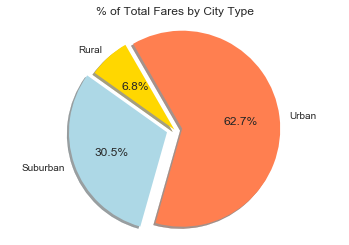

In [136]:
# group data by city Type
group_by_type = combined_df.groupby('type')
#group_by_type.head()
#total fare calculation
total_fare = group_by_type['fare'].sum()

labels = total_fare.index


# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0.08, 0.08)

colors = ['Gold','lightblue','coral']

plt.pie(total_fare, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True,startangle=120)

#Title and axis
plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()


# Total Rides by city type

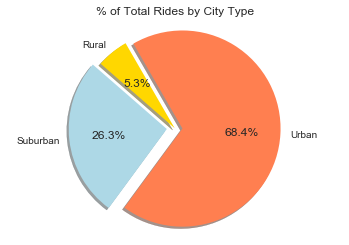

In [140]:
# total Rides by city type

total_ride = group_by_type['ride_id'].count()

labels = total_ride.index


# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0.08, 0.08)

colors = ['Gold','lightblue','coral']

plt.pie(total_ride, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True,startangle=120)

#Title and axis
plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.show()


# Drivers by city type

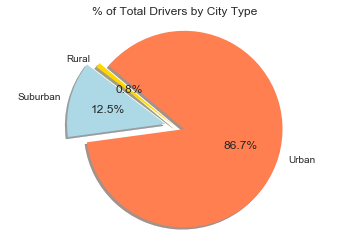

In [141]:
# drivers by city type
total_driver = group_by_type ['driver_count'].sum()
labels = total_driver.index


# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0.1, 0.1)

colors = ['Gold','lightblue','coral']

plt.pie(total_driver, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True,startangle=140)

#Title and axis
plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.show()
